### <span style = 'color:green'> Capstone Project </span>
#### <span style = 'color:blue'> Problem statement : Perform sentiment analysis on Omnicron variant, data fetching directly from twitter</span>
**Sentiment analysis is the process of identifying feelings and emotions expressed in words, through ML or AI**

**Project Pipeline**

Various steps in completing project are

- **Import Necessary Dependencies**
- **Read and Load the Dataset**
- **Exploratory Data Analysis**
- **Data Visualization of Target Variables**
- **Data Preprocessing**
- **Splitting our data into Train and Test Subset**
- **Transforming Dataset using TF-IDF Vectorizer**
- **Function for Model Evaluation**
- **Model Building**
- **Conclusion**

- Here we have to get dataset directly fetched from twitter in realtime 

- performing realtime sentimental analysis on realtime data collecting from twitter
- objective: perform sentiment analysis on realtime data collected from twitter 

                      

           

### <span style = 'color:blue'>   API (Application Programm Interface)</span>
- Imagine you’re sitting at a table in a restaurant with a menu of choices to order from. The kitchen is the part of the “system” that will prepare your order. What is missing is the critical link to communicate your order to the kitchen and deliver your food back to your table. That’s where the waiter or API comes in. The waiter is the messenger – or API – that takes your request or order and tells the kitchen – the system – what to do. Then the waiter delivers the response back to you; in this case, it is the food.
- API's are huge and are used everywhere
- In simple words api stands as bridge for one to access the content in one's storage 
- There are many APIs on the Twitter platform that software developers can engage with, with the ultimate possibility to create fully automated systems which will interact with Twitter. While this feature could benefit companies by drawing insights from Twitter data

   **From twitter api it's possible to extract many insights some are**
- Tweets: searching, posting, filtering, engagement, streaming etc.
- Accounts and users (Beta): account management, user interactions.
- Media: uploading and accessing photos, videos and animated GIFs.
- Trends: trending topics in a given location.
- Geo: information about known places or places near a location.

**Getting twitter API keys**
- If you don't already have an account, you can login with your normal Twitter credentials 


- follow the required prompts to create a developer project or click here <a href="https://dev.twitter.com/apps" title="Twitter">Click here</a>
- Requesting the API key and secret via the Developer Portal causes Twitter to produce the following three things:
1. API key (this is your 'consumer key')
2. API secret key (this is your 'consumer secret')
3. Bearer token
- Next, visit the 'Authentication Tokens' area of the Developer Portal and generate an 'Access token & secret'. This will provide you with the following two items:
1. Access token (this is your 'token key')
2. Access token secret (this is your 'token secret')


**Expected output**
- the data fetched from twitter should undergo EDA for analyzing, cleaning, handling, manupulation, visualization..,etc
- final output should show the sentiment of the data


  *Some tips to consider*

- Machines can learn in every possible way so its always better to think out of the box
    
- Perform eda as diverse as possible and in contineous manner
    
- Try configuring with diffrent models to know how each model is diffrent with other ones 
    
- Donot try to involve unneccesory codes and useless algorithms for dataset which just increases complexity
    
- Approaching problem statement in n number of ways helps us to find best one possible
    
- It's easier for one to understnd and manupulate if we have models as simple as possible 
    
- When we have multiple models we can have multiple judgements based on models and their efficiencies
    
- Tuning helps increasing accuracy :)
    
- Have an idea of time consumed by the model, its better to have a model whose time management is good
    
- Spend good amount of time on analyzing dataset and draw as much insights as possible

- Tweepy is importantlibrary we will using to fetch data from twitter by api


For more on tweepy documentation please click here <a href="https://docs.tweepy.org/en/stable/getting_started.html#hello-tweepy" title="Tweepy">Click here</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import LancasterStemmer
from bs4 import BeautifulSoup
#import spacy
import re,unicodedata,string
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import re

In [2]:
# Importing the dataset
df = pd.read_csv('Twitter_Omicron_data.csv')


In [3]:
df.head(10)

,tweets,likes,time,retweet_count
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1
5,FGS @UKHSA pauses ONS C-19 Infection Survey 4 ...,0,2023-03-09 18:12:53,0
6,"@SandraHelena39 Look on the bright side, Omicr...",0,2023-03-09 18:12:48,0
7,@OMICRON_XBB Dream bigger,0,2023-03-09 18:11:32,0
8,@NOTSubzerodrew As my last wish,0,2023-03-09 18:10:28,0
9,"@thereal_truther @SadieXShaw Again, graphs are...",0,2023-03-09 18:10:23,0


In [4]:
df.shape

(6998, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweets         6998 non-null   object
 1   likes          6998 non-null   int64 
 2   time           6998 non-null   object
 3   retweet_count  6998 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 218.8+ KB


In [6]:
df['tweets']

0       6 big questions about new Omicron-targeting bo...
1                    I'm confused https://t.co/NyfgdYUYAT
2       Long COVID less likely after Omicron than afte...
3       The finding don't tally with the high numbers ...
4       A conference abstract from the European Congre...
                              ...                        
6993    @Cycl_Conscience @BallouxFrancois Your argumen...
6994    @BretWeinstein I don't think it escaped, they ...
6995    @_50kgold Do you have to show your face? I'd b...
6996    @noxcato @andrewtanyongyi @TAH_Sci @hsom113 @M...
6997    In light of the fact that #Omicron is unrelate...
Name: tweets, Length: 6998, dtype: object

In [7]:
#Remove weird spaces, stopwords and perform basic pre-processing - spelling correction, etc.
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.tokenize import ToktokTokenizer
toktok = ToktokTokenizer()
stopwords_list = nltk.corpus.stopwords.words('english')

In [9]:
#to reduce dimensionality complexity we are choosing tweets and tweets count
df = df[['tweets','retweet_count']]

In [10]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
#Removing Outliers and Noise reduction
stemmer = PorterStemmer()
leammatizer = WordNetLemmatizer()

In [12]:
def remove_html(text):
    return re.sub(r':.*$', ":",text) #Remove urls

def remove_tags(text):
  return re.sub('@[A-Za-z0-9-]+([A-Z|a-z])','',text)

def strip_html(text):
    soup = BeautifulSoup(text,"html.parser") #Remove https words
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]','',text)   #Remove special characters

def denoise_text(text):
    text = remove_html(text)
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_tags(text)
    return text  #Function call

In [13]:
df['review'] = df['tweets'].apply(denoise_text)
df.head(5)

,tweets,retweet_count,review
0,6 big questions about new Omicron-targeting bo...,0,6 big questions about new Omicron-targeting bo...
1,I'm confused https://t.co/NyfgdYUYAT,0,I'm confused https:
2,Long COVID less likely after Omicron than afte...,0,Long COVID less likely after Omicron than afte...
3,The finding don't tally with the high numbers ...,0,The finding don't tally with the high numbers ...
4,A conference abstract from the European Congre...,1,A conference abstract from the European Congre...


In [14]:
# removing Special characters
def remove_special_characters(text,remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

df['review'] = df['review'].apply(remove_special_characters)
df.head(2)

,tweets,retweet_count,review
0,6 big questions about new Omicron-targeting bo...,0,6 big questions about new Omicrontargeting boo...
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https


In [15]:
#stemming
def simpleStemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

df['stem_review'] = df['review'].apply(simpleStemmer)
df.head(2)

,tweets,retweet_count,review,stem_review
0,6 big questions about new Omicron-targeting bo...,0,6 big questions about new Omicrontargeting boo...,6 big question about new omicrontarget booster...
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http


In [16]:
#lemmatization
def simpleLemmatization(text):
    lemma = nltk.stem.WordNetLemmatizer()
    text = ' '.join([lemma.lemmatize(word) for word in text.split()])
    return text

df['lemmatize_review'] = df['review'].apply(simpleLemmatization)
df.head(2)

,tweets,retweet_count,review,stem_review,lemmatize_review
0,6 big questions about new Omicron-targeting bo...,0,6 big questions about new Omicrontargeting boo...,6 big question about new omicrontarget booster...,6 big question about new Omicrontargeting boos...
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http,Im confused http


In [17]:
#removing stopwards
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text,is_lower_case=False):
    tokens = toktok.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df['final_review'] = df['review'].apply(remove_stopwords)
df.head(2)

,tweets,retweet_count,review,stem_review,lemmatize_review,final_review
0,6 big questions about new Omicron-targeting bo...,0,6 big questions about new Omicrontargeting boo...,6 big question about new omicrontarget booster...,6 big question about new Omicrontargeting boos...,6 big questions new Omicrontargeting boosters ...
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http,Im confused http,Im confused https


In [18]:
#Normalise test and train reviews

norm_train_reviews = df.final_review[:3000]
print(norm_train_reviews[0])



6 big questions new Omicrontargeting boosters Boosting Target targeting boost https


In [19]:
df.shape

(6998, 6)

In [20]:
norm_test_reviews=df.final_review[3001:]
print(norm_test_reviews[5000])

Sounds like reasonable argument boosters never showed great efficacy Omicron variants


In [21]:
#bag of words
cv = CountVectorizer()

In [22]:
cv_train_reviews = cv.fit_transform(norm_train_reviews)
cv_test_reviews = cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (3000, 9052)
BOW_cv_test: (3997, 9052)


In [23]:
cv_train_reviews[1]

<1x9052 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [24]:
cv_train_reviews[1].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
# Tf-idf; Term frequency and inverse document frequency
tv = TfidfVectorizer()

In [26]:
tv_train_reviews = tv.fit_transform(norm_train_reviews)
tv_test_reviews=tv.transform(norm_test_reviews)


print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (3000, 9052)
Tfidf_test: (3997, 9052)


In [27]:
#Most tweeted words

In [28]:
tok = lambda x:word_tokenize(x)
df['tokenize'] = df['final_review'].apply(tok)
df.head(2)

,tweets,retweet_count,review,stem_review,lemmatize_review,final_review,tokenize
0,6 big questions about new Omicron-targeting bo...,0,6 big questions about new Omicrontargeting boo...,6 big question about new omicrontarget booster...,6 big question about new Omicrontargeting boos...,6 big questions new Omicrontargeting boosters ...,"[6, big, questions, new, Omicrontargeting, boo..."
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http,Im confused http,Im confused https,"[Im, confused, https]"


In [29]:
import itertools,collections

new_tokenize = df['tokenize']
all_words = list(itertools.chain(*new_tokenize))

In [30]:
counts = collections.Counter(all_words)
count_frequency = counts.most_common(200)

clean_tweets = pd.DataFrame(counts.most_common(200),columns=['words', 'count'])
clean_tweets.head()

,words,count
0,Omicron,4309
1,https,2473
2,omicron,1839
3,variant,818
4,people,577


,tweets,retweet_count,review,stem_review,lemmatize_review,final_review,tokenize
0,6 big questions about new Omicron-targeting bo...,0,6 big questions about new Omicrontargeting boo...,6 big question about new omicrontarget booster...,6 big question about new Omicrontargeting boos...,6 big questions new Omicrontargeting boosters ...,"[6, big, questions, new, Omicrontargeting, boo..."
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http,Im confused http,Im confused https,"[Im, confused, https]"
2,Long COVID less likely after Omicron than afte...,0,Long COVID less likely after Omicron than afte...,long covid less like after omicron than after ...,Long COVID le likely after Omicron than after ...,Long COVID less likely Omicron original virus ...,"[Long, COVID, less, likely, Omicron, original,..."
3,The finding don't tally with the high numbers ...,0,The finding dont tally with the high numbers w...,the find dont talli with the high number we se...,The finding dont tally with the high number we...,finding dont tally high numbers see bulletins ...,"[finding, dont, tally, high, numbers, see, bul..."
4,A conference abstract from the European Congre...,1,A conference abstract from the European Congre...,a confer abstract from the european congress o...,A conference abstract from the European Congre...,conference abstract European Congress Clinical...,"[conference, abstract, European, Congress, Cli..."
...,...,...,...,...,...,...,...
6993,@Cycl_Conscience @BallouxFrancois Your argumen...,0,Conscience Your argument is flawed Masks work...,conscienc your argument is flaw mask work we d...,Conscience Your argument is flawed Masks work ...,Conscience argument flawed Masks work know sil...,"[Conscience, argument, flawed, Masks, work, kn..."
6994,"@BretWeinstein I don't think it escaped, they ...",0,I dont think it escaped they opened the cell ...,i dont think it escap they open the cell door ...,I dont think it escaped they opened the cell d...,dont think escaped opened cell door wanted hap...,"[dont, think, escaped, opened, cell, door, wan..."
6995,@_50kgold Do you have to show your face? I'd b...,0,50kgold Do you have to show your face Id be ru...,50kgold do you have to show your face id be ru...,50kgold Do you have to show your face Id be ru...,50kgold show face Id running errands gettin cu...,"[50kgold, show, face, Id, running, errands, ge..."
6996,@noxcato @andrewtanyongyi @TAH_Sci @hsom113 @M...,0,Sci 113 That it all worked before DeltaOmic...,sci 113 that it all work befor deltaomicron is...,Sci 113 That it all worked before DeltaOmicron...,Sci 113 worked DeltaOmicron fallback position ...,"[Sci, 113, worked, DeltaOmicron, fallback, pos..."


In [31]:
Number = input('No of most common words to plot: ')
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets[:25].sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='maroon')
ax.set_title("Common Words Found in Tweets (Including All Words)")
plt.show()

KeyboardInterrupt: Interrupted by user

In [48]:
#Installing textblob
!pip install textblob
from textblob import TextBlob

In [59]:
#polarity and subjectivity
pol = lambda x:TextBlob(x).sentiment.polarity
sub = lambda x:TextBlob(x).sentiment.subjectivity

df['polarity'] = df['final_review'].apply(pol)
df['subjectivity'] = df['final_review'].apply(sub)

df.head(10)

,tweets,retweet_count,review,stem_review,lemmatize_review,final_review,tokenize,polarity,subjectivity
0,6 big questions about new Omicron-targeting bo...,0,6 big questions about new Omicrontargeting boo...,6 big question about new omicrontarget booster...,6 big question about new Omicrontargeting boos...,6 big questions new Omicrontargeting boosters ...,"[6, big, questions, new, Omicrontargeting, boo...",0.068182,0.277273
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http,Im confused http,Im confused https,"[Im, confused, https]",-0.400000,0.700000
2,Long COVID less likely after Omicron than afte...,0,Long COVID less likely after Omicron than afte...,long covid less like after omicron than after ...,Long COVID le likely after Omicron than after ...,Long COVID less likely Omicron original virus ...,"[Long, COVID, less, likely, Omicron, original,...",0.039583,0.554167
3,The finding don't tally with the high numbers ...,0,The finding dont tally with the high numbers w...,the find dont talli with the high number we se...,The finding dont tally with the high number we...,finding dont tally high numbers see bulletins ...,"[finding, dont, tally, high, numbers, see, bul...",0.160000,0.540000
4,A conference abstract from the European Congre...,1,A conference abstract from the European Congre...,a confer abstract from the european congress o...,A conference abstract from the European Congre...,conference abstract European Congress Clinical...,"[conference, abstract, European, Congress, Cli...",-0.083333,0.033333
5,FGS @UKHSA pauses ONS C-19 Infection Survey 4 ...,0,FGS pauses ONS C19 Infection Survey 4 many mo...,fg paus on c19 infect survey 4 mani month as g...,FGS pause ONS C19 Infection Survey 4 many mont...,FGS pauses ONS C19 Infection Survey 4 many mon...,"[FGS, pauses, ONS, C19, Infection, Survey, 4, ...",0.027273,0.404242
6,"@SandraHelena39 Look on the bright side, Omicr...",0,39 Look on the bright side Omicron is practica...,39 look on the bright side omicron is practic ...,39 Look on the bright side Omicron is practica...,39 Look bright side Omicron practically harmle...,"[39, Look, bright, side, Omicron, practically,...",0.700000,0.800000
7,@OMICRON_XBB Dream bigger,0,XBB Dream bigger,xbb dream bigger,XBB Dream bigger,XBB Dream bigger,"[XBB, Dream, bigger]",0.000000,0.500000
8,@NOTSubzerodrew As my last wish,0,As my last wish,as my last wish,As my last wish,last wish,"[last, wish]",0.000000,0.066667
9,"@thereal_truther @SadieXShaw Again, graphs are...",0,truther Again graphs are useless when definit...,truther again graph are useless when definit a...,truther Again graph are useless when definitio...,truther graphs useless definitions faulty name...,"[truther, graphs, useless, definitions, faulty...",-0.012963,0.318519


In [63]:
PNN = df['polarity'].apply(lambda x: "Positive" if x>=0.05 else ("Negative" if x<= -0.05 else "Neutral"))
new_review = df['final_review']
new_review = new_review.tolist()
PNN = PNN.tolist()

dict = {'text':new_review, 'polarity':PNN}
pnn = pd.DataFrame(dict)
pnn.head()

,text,polarity
0,6 big questions new Omicrontargeting boosters ...,Positive
1,Im confused https,Negative
2,Long COVID less likely Omicron original virus ...,Neutral
3,finding dont tally high numbers see bulletins ...,Positive
4,conference abstract European Congress Clinical...,Negative


In [68]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --------- ------------------------------ 71.7/300.2 kB 1.3 MB/s eta 0:00:01
   ------------------- -------------------- 143.4/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.4 MB/s eta 0:00:00


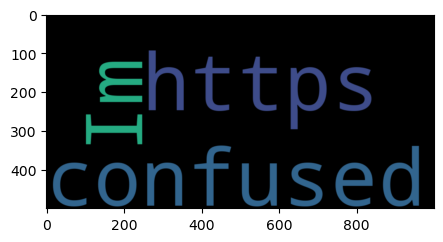

In [69]:
#Using wordcloud or other visualization techniques, Find the most common words used positive and negative tweets
from wordcloud import WordCloud
plt.figure(figsize=(5,5))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show()

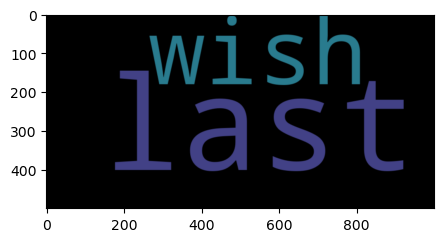

In [70]:
plt.figure(figsize=(5,5))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show()

In [71]:
#Converting the numerical data to categorical - Positive and Negative¶

df['PN'] = df['polarity'].apply(lambda x: "Positive" if x>=0 else "Negative")
df.head(2)

,tweets,retweet_count,review,stem_review,lemmatize_review,final_review,tokenize,polarity,subjectivity,PN
0,6 big questions about new Omicron-targeting bo...,0,6 big questions about new Omicrontargeting boo...,6 big question about new omicrontarget booster...,6 big question about new Omicrontargeting boos...,6 big questions new Omicrontargeting boosters ...,"[6, big, questions, new, Omicrontargeting, boo...",0.068182,0.277273,Positive
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http,Im confused http,Im confused https,"[Im, confused, https]",-0.400000,0.700000,Negative


In [72]:
#Label Binarizer
lb = LabelBinarizer()
df['label'] = lb.fit_transform(df['PN'])
df.head(2)

,tweets,retweet_count,review,stem_review,lemmatize_review,final_review,tokenize,polarity,subjectivity,PN,label
0,6 big questions about new Omicron-targeting bo...,0,6 big questions about new Omicrontargeting boo...,6 big question about new omicrontarget booster...,6 big question about new Omicrontargeting boos...,6 big questions new Omicrontargeting boosters ...,"[6, big, questions, new, Omicrontargeting, boo...",0.068182,0.277273,Positive,1
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http,Im confused http,Im confused https,"[Im, confused, https]",-0.400000,0.700000,Negative,0


In [73]:
df.shape

(6998, 11)

In [99]:
train = df.label[:3000]
test = df.label[3001:]

In [100]:
train.shape

(3000,)

In [101]:
test.shape

(3997,)

In [102]:
#modelling the dataset using Support Vector Machines
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr_bow = lr.fit(cv_train_reviews,train) #From Bag of Words
print(lr_bow)

lr_tfidf = lr.fit(tv_train_reviews,train) #TFIDF 
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [103]:
#Linear support vector machines for bag of words and tfidf features

from sklearn import svm
svm = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
svm_bow = svm.fit(cv_train_reviews,train)
print(svm_bow)
svm_tfidf = svm.fit(tv_train_reviews,train)
print(svm_tfidf)

SVC(kernel='linear', random_state=0)
SVC(kernel='linear', random_state=0)


In [104]:
#Model building and evaluation
svm_bow_predict = svm.predict(cv_test_reviews)
print(svm_bow_predict)
svm_tfidf_predict = svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[0 0 1 ... 1 0 1]
[1 0 1 ... 1 1 1]


In [105]:
#Accuracy Score
svm_bow_score = accuracy_score(test,svm_bow_predict)
print(svm_bow_score)
svm_tfidf_score = accuracy_score(test,svm_tfidf_predict)
print(svm_tfidf_score)

0.8273705278959219
0.8436327245434075


In [106]:
# Classification report
svm_bow_report = classification_report(test,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
svm_tfidf_report = classification_report(test,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.65      0.58      0.61       937
    Negative       0.87      0.90      0.89      3060

    accuracy                           0.83      3997
   macro avg       0.76      0.74      0.75      3997
weighted avg       0.82      0.83      0.82      3997

              precision    recall  f1-score   support

    Positive       0.82      0.43      0.56       937
    Negative       0.85      0.97      0.90      3060

    accuracy                           0.84      3997
   macro avg       0.83      0.70      0.73      3997
weighted avg       0.84      0.84      0.82      3997



In [107]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier (criterion = 'entropy',max_depth=3)

In [108]:
dtc_bow = dtc.fit(cv_train_reviews,train)
print(dtc_bow)
dtc_tfidf = dtc.fit(tv_train_reviews,train)
print(dtc_tfidf)

DecisionTreeClassifier(criterion='entropy', max_depth=3)
DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [109]:
dtc_bow_predict = dtc.predict(cv_test_reviews)
print(dtc_bow_predict)
dtc_tfidf_predict = dtc.predict(tv_test_reviews)
print(dtc_tfidf_predict)

[0 1 1 ... 1 1 1]
[0 1 1 ... 1 1 1]


In [110]:
dtc_bow_score = accuracy_score(test,dtc_bow_predict)
print(dtc_bow_score)
dtc_tfidf_score = accuracy_score(test,dtc_tfidf_predict)
print(dtc_tfidf_score)

0.7895921941456092
0.7903427570678009


In [111]:
dtc_bow_report = classification_report(test,dtc_bow_predict,target_names=['Positive','Negative'])
print(dtc_bow_report)
dtc_tfidf_report = classification_report(test,dtc_tfidf_predict,target_names=['Positive','Negative'])
print(dtc_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.68      0.20      0.30       937
    Negative       0.80      0.97      0.88      3060

    accuracy                           0.79      3997
   macro avg       0.74      0.58      0.59      3997
weighted avg       0.77      0.79      0.74      3997

              precision    recall  f1-score   support

    Positive       0.68      0.20      0.31       937
    Negative       0.80      0.97      0.88      3060

    accuracy                           0.79      3997
   macro avg       0.74      0.58      0.59      3997
weighted avg       0.77      0.79      0.74      3997



In [112]:
cm_bow = confusion_matrix(test,dtc_bow_predict,labels=[0,1])
print(cm_bow)
cm_tfidf = confusion_matrix(test,dtc_tfidf_predict,labels=[0,1])
print(cm_tfidf)

[[ 184  753]
 [  88 2972]]
[[ 184  753]
 [  85 2975]]


In [ ]:
Conclusion : SVm is giving more accurate results on this .